#### Problem : Identify the effects of age on recurrence

In [5]:
#activating the virtual tf-gpu 
#!conda create -n tensorflow_env
# !conda activate tf-gpu
#!conda install -c conda-forge tensorflow
# !conda list
#!conda info --envs
#!conda list -n tf-gpu
# import tensorflow as tf
# !conda deactivate
#do these in conda terminal
#!conda create --name tf_gpu tensorflow-gpu
#!conda create --name tf_gpu
#!conda activate tf_gpu
#conda install tensorflow-gpu
#conda install -c anaconda ipykernel #to get conda env into jupyter notebook kernel
#python -m ipykernel install --user --name=tf-gpu
#Note activate venv in conda cmd prompt
#Note: If you face issues with tensorflow, then make sure that you have same python version in base version of conda and the virtual env we are using.
#Check in Anaconda Navigator Environments section. If they are not same,
#go to anconda prompt from start menu, activate the virtaul environment of our choice, tf or tf-gpu, conda activate venvname
#Install python version similar to the base version, conda instal python=3.8.10
#we can also update python versions from the navigator and the prompt

#in windows cmd
#python -c "import numpy as np; print(np.__version__)" 
#python -c "import tensorflow as tf; print(tf.__version__)" 
#pip list
#pip install numpy==1.23.4
#pip uninstall numpy
#make sure to do anything in venv instead of global update
#python -m venv envname 
#envname\sripts\activate
#pip install your packages

#to add windows venv to conda
#freeze the reqs in python venv in windows terminal
#pip freeze > requirements.txt
#go to conda navigator, import environment from local drive, add the requirements.txt file
#activate this environment in conda terminal
#add it as ipykernel using the below ipykernel commands in this new activate environment in conda terminal
#conda install -c anaconda ipykernel #to get conda env into jupyter notebook kernel
#python -m ipykernel install --user --name=tf-gpu

In [3]:
!conda activate tf-gpu

In [1]:
import sys
print(sys.version)

3.8.10 (default, May 19 2021, 13:12:57) [MSC v.1916 64 bit (AMD64)]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting as pdplt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, PrecisionRecallDisplay, auc, accuracy_score, f1_score
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.utils import plot_model

In [5]:
#Load data
data = pd.read_csv("E:\Learning\ML\Datasets\data\\breast-cancer.data")
data.columns = ['target', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irradiat']
# Separating the variables
X = data.iloc[:, 1:10]
Y = data.iloc[:, 0]
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [50]:
Y.head()

0    no-recurrence-events
1    no-recurrence-events
2    no-recurrence-events
3    no-recurrence-events
4    no-recurrence-events
Name: target, dtype: object

In [6]:
X.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [52]:
X.shape

(285, 9)

In [48]:
Y.shape

(285,)

In [49]:
X.node_caps.dtypes

dtype('O')

In [53]:
X.dtypes #note that we need to cast all the features into meaningful datatypes instead of object

age            object
menopause      object
tumor_size     object
inv_nodes      object
node_caps      object
deg_malig       int64
breast         object
breast_quad    object
irradiat       object
dtype: object

In [51]:
Y.dtypes

dtype('O')

### Datatype conversions/casting
	to_numeric()
    --------------
    (non-numeric ones are left as it is)
			- df['col'] = pd.to_numeric(df['col'], errors='coerce', downcast='float') # convert column col of a DataFrame to numeric, coerce to force the unknown values to NaN
			- df = df.apply(pd.to_numeric, errors='ignore', downcast='unsigned') # convert all columns of DataFrame to int64 or float64
			- df[['col1', 'col2']] = df[['col1', 'col2']].apply(pd.to_numeric, downcast='int') # convert just columns "col1" and "col2", Downcasting explicitly to 'integer' uses the smallest possible integer(instead of default int64) to save memory
	
    astype() 
    ---------
    (need to be careful with signed numbers, NaN or inf values raises errors, use errors="ignore" attribute to handle)
    - df = df.astype(int, errors="ignore") # convert all DataFrame columns to the int64 dtype
    - df = df.astype({"a": int, "b": complex}) # convert column "a" to int64 dtype and "b" to complex type
    - s = s.astype(np.float16) # convert Series to float16 type
    - s = s.astype(str) # convert Series to Python strings
    - s = s.astype('category') # convert Series to categorical type - see docs for more details
	
    infer_objects()
    ---------------
      (pandas introduced it for converting columns of a DataFrame that have an object datatype to a more specific type)
        - df = df.infer_objects() #changes the type of numeric columns to int64 and string columns are left alone. we can use astype() in such cases
	
    convert_dtypes()
    ---------------
        (convert Series and DataFrame columns to the best possible dtype that supports the pd.NA missing value)
        - df = df.convert_dtypes()
        
      Ref: https://stackoverflow.com/questions/15891038/change-column-type-in-pandas

(array([90.,  0., 57.,  0., 96.,  0., 35.,  0.,  6.,  1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

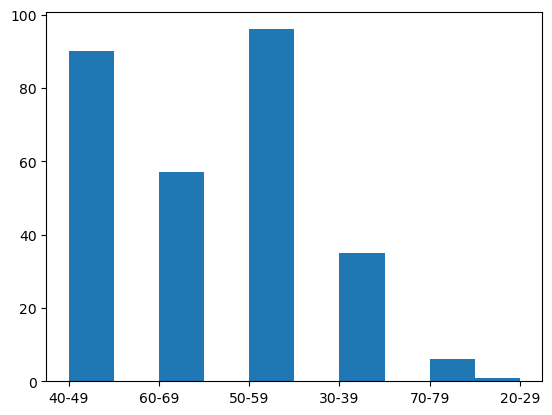

In [54]:
plt.hist(X.age)

(array([149.,   0.,   0.,   0.,   0., 129.,   0.,   0.,   0.,   7.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

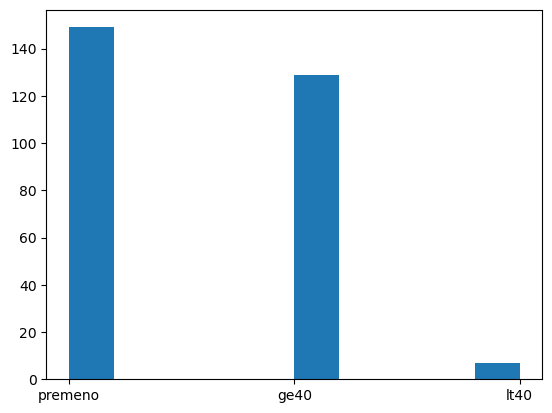

In [55]:
plt.hist(X.menopause)

(array([50., 30.,  8., 54.,  8., 28., 59., 22., 19.,  7.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

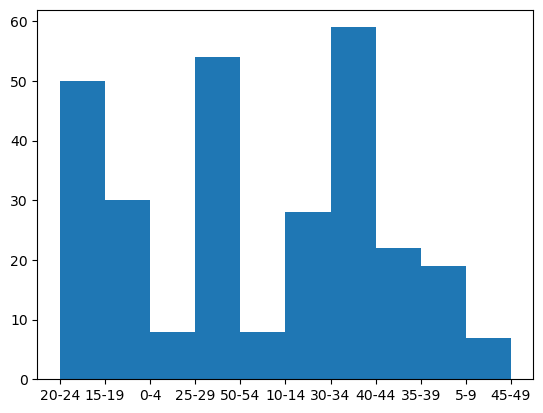

In [56]:
plt.hist(X.tumor_size)

(array([217.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

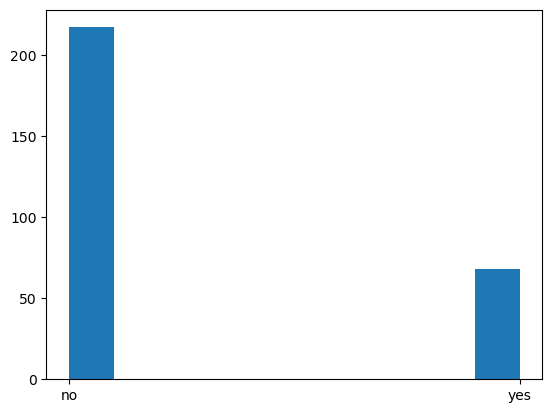

In [57]:
plt.hist(X.irradiat)

In [58]:
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          285 non-null    object
 1   menopause    285 non-null    object
 2   tumor_size   285 non-null    object
 3   inv_nodes    285 non-null    object
 4   node_caps    285 non-null    object
 5   deg_malig    285 non-null    int64 
 6   breast       285 non-null    object
 7   breast_quad  285 non-null    object
 8   irradiat     285 non-null    object
dtypes: int64(1), object(8)
memory usage: 20.2+ KB


,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [40]:
#pdplt.scatter_matrix(X, diagonal='kde')

#### Observation

    Scatter matrix works after preprocessing our categorical data.
    If we observe, the age is in numerical range, other few features are eventhough nominal but of type object.So we have to preprocess them into numerical.

In [59]:
#INFO
#Label Encoding -replaces the categorical value with a numeric value between 0 and the number of values minus 1.
#If the categorical variable value contains 5 distinct classes/values, we use (0, 1, 2, 3, and 4).

labelencoder = LabelEncoder()
X['menopause'] = labelencoder.fit_transform(X.menopause)
X.menopause.unique()

array([2, 0, 1])

In [60]:
X.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,40-49,2,20-24,0-2,no,2,right,right_up,no
1,40-49,2,20-24,0-2,no,2,left,left_low,no
2,60-69,0,15-19,0-2,no,2,right,left_up,no
3,40-49,2,0-4,0-2,no,2,right,right_low,no
4,60-69,0,15-19,0-2,no,2,left,left_low,no


#### Observation:
    "If we observe, the values 0, 1, 2 are assigned to different values of column menopause."
    "But, these value doesnt mean any prioirity. But the mathematical ML model will take it as 2>1>0"
    "Hence it is advisable to use one hot encoding for nominal features and label encoding for target.")

In [11]:
#INFO
#OneHot Encoding:  for each category/value of a feature, we create a column (sometimes called a dummy variable) with binary encoding (0 or 1) 
#to denote whether a particular row belongs to this category.
#Meaning, one-hot encoding is the fact that we are creating additional columns, one for each unique value in the set of the categorical attribute we’d like to encode

#Implementation from scipy module
oh_encoder= OneHotEncoder(drop='first', sparse=False, handle_unknown='error')
encoded_X = oh_encoder.fit_transform(X)
print(type(encoded_X))

<class 'numpy.ndarray'>


In [12]:
np.set_printoptions(edgeitems=10)
np.core.arrayprint._line_width = 180

print(encoded_X)

[[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. ... 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 1. ... 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. ... 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. ... 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. ... 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. ... 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. ... 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. ... 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 1. ... 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. ... 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. ... 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. ... 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. ... 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. ... 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. ... 1. 0. 1. 0. 0. 1. 0. 

In [143]:
encoded_X.shape

(285, 34)

In [144]:
#Lets perform one hot enocding for each feature invidually to see how many extra columns each feature is contributing to.
for feature in range(len(X.columns)):
    feature_name = X.columns[feature]
    print("Encoding feature: {}".format(feature_name))
    encoded_feature = OneHotEncoder(drop='first', sparse=False).fit_transform(X[[feature_name]])
    print(encoded_feature.shape)

Encoding feature: age
(285, 5)
Encoding feature: menopause
(285, 2)
Encoding feature: tumor_size
(285, 10)
Encoding feature: inv_nodes
(285, 6)
Encoding feature: node_caps
(285, 2)
Encoding feature: deg_malig
(285, 2)
Encoding feature: breast
(285, 1)
Encoding feature: breast_quad
(285, 5)
Encoding feature: irradiat
(285, 1)


#### Observation:
    Looks like tumor size , age, inv_nodes are contribution more dimensions 

In [7]:
#Onehotencoding from pandas
encoded_pd_X = pd.get_dummies(X, drop_first=True, sparse=False)
encoded_pd_X.shape

(285, 33)

In [8]:
encoded_pd_X.head()

,deg_malig,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor_size_10-14,tumor_size_15-19,...,inv_nodes_9-11,node_caps_no,node_caps_yes,breast_right,breast_quad_central,breast_quad_left_low,breast_quad_left_up,breast_quad_right_low,breast_quad_right_up,irradiat_yes
0,2,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,2,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
3,2,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
4,2,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [67]:
encoded_pd_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   menopause              285 non-null    int32
 1   deg_malig              285 non-null    int64
 2   age_30-39              285 non-null    uint8
 3   age_40-49              285 non-null    uint8
 4   age_50-59              285 non-null    uint8
 5   age_60-69              285 non-null    uint8
 6   age_70-79              285 non-null    uint8
 7   tumor_size_10-14       285 non-null    uint8
 8   tumor_size_15-19       285 non-null    uint8
 9   tumor_size_20-24       285 non-null    uint8
 10  tumor_size_25-29       285 non-null    uint8
 11  tumor_size_30-34       285 non-null    uint8
 12  tumor_size_35-39       285 non-null    uint8
 13  tumor_size_40-44       285 non-null    uint8
 14  tumor_size_45-49       285 non-null    uint8
 15  tumor_size_5-9         285 non-null    u

In [68]:
#Lets perform one hot enocding using pandas.get_dummies for each feature invidually to see how many extra columns each feature is contributing to.
for feature in range(len(X.columns)):
    feature_name = X.columns[feature]
    print("Encoding feature: {}".format(feature_name))
    encoded_feature = pd.get_dummies(X[[feature_name]], drop_first=True, sparse=False)
    print(encoded_feature.shape)

Encoding feature: age
(285, 5)
Encoding feature: menopause
(285, 1)
Encoding feature: tumor_size
(285, 10)
Encoding feature: inv_nodes
(285, 6)
Encoding feature: node_caps
(285, 2)
Encoding feature: deg_malig
(285, 1)
Encoding feature: breast
(285, 1)
Encoding feature: breast_quad
(285, 5)
Encoding feature: irradiat
(285, 1)


 #### Observation
     If we observe one hot encoding from scipy and pandas, pandas is using label encoding for few features like age, menopause.But it also gives comprehendebale names to the encoded columns like tumor_size.But one hot encoding from scipy is doing its job in encoding but may result in high dimensionality and dummy variable traps and collinearity between features.

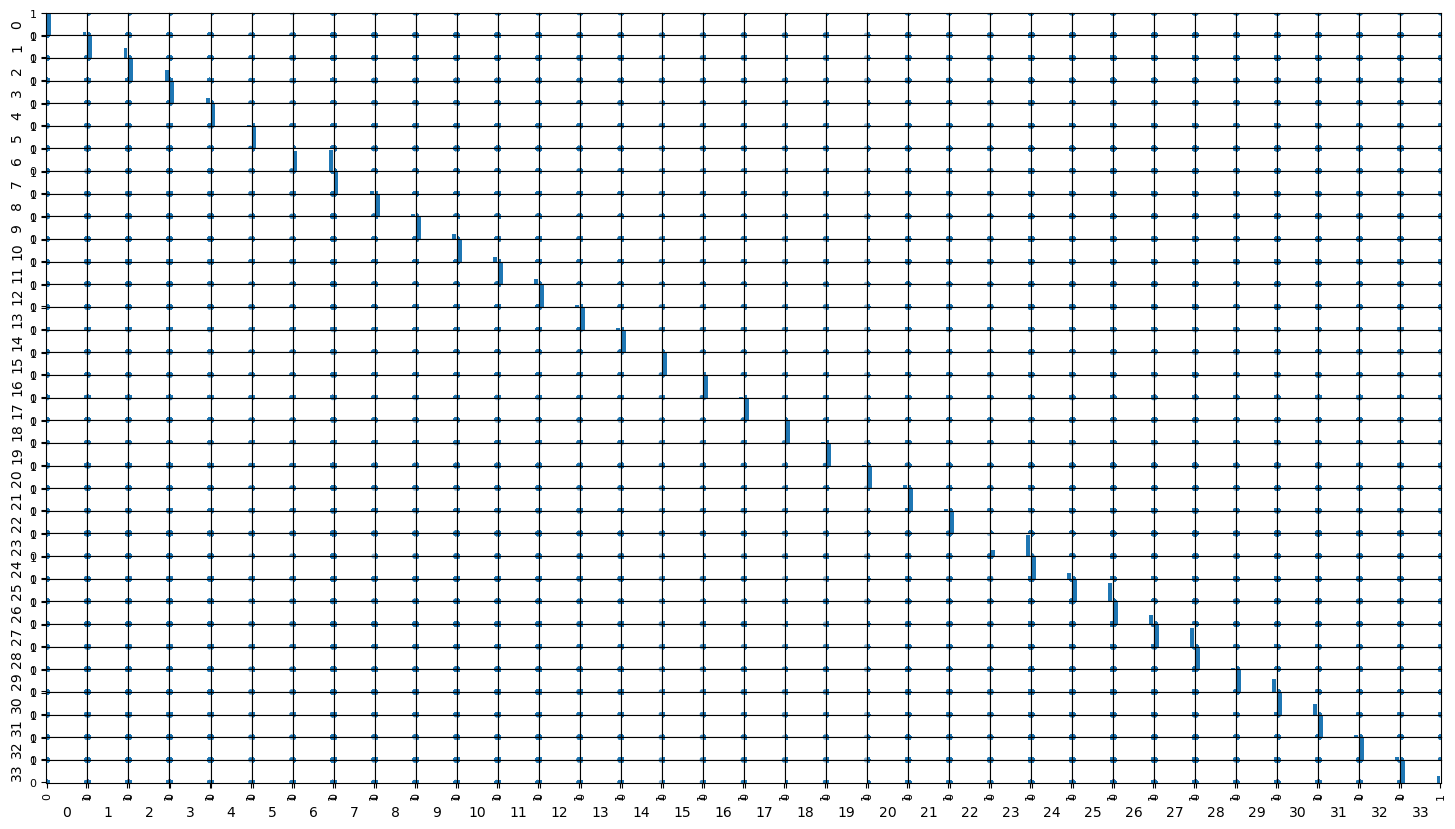

In [73]:
pdplt.scatter_matrix(pd.DataFrame(encoded_X), figsize=(18, 10))
plt.show()

In [77]:
# pdplt.scatter_matrix(pd.DataFrame(encoded_pd_X), figsize=(18, 18))
# plt.show()

In [9]:
#Encoding the target - Using Label Encoder when dealing with single/target variable
l_encoder = LabelEncoder()
encoded_Y = l_encoder.fit_transform(Y)
np.unique(encoded_Y)
#we can also use map with dict to do the mapping of target variable
#mydict = {'class0label': 0, 'class1label': 1}
#encoded_Y = [*map(mydict.get, Y)]

array([0, 1])

In [13]:
#converting numpy array to pandas df to get better view of correlation matrix
encoded_X_oh_df = pd.DataFrame(encoded_X, columns=oh_encoder.get_feature_names_out())
encoded_Y_oh_df = pd.DataFrame(encoded_Y, columns=['is_recurrence?'])

<AxesSubplot:>

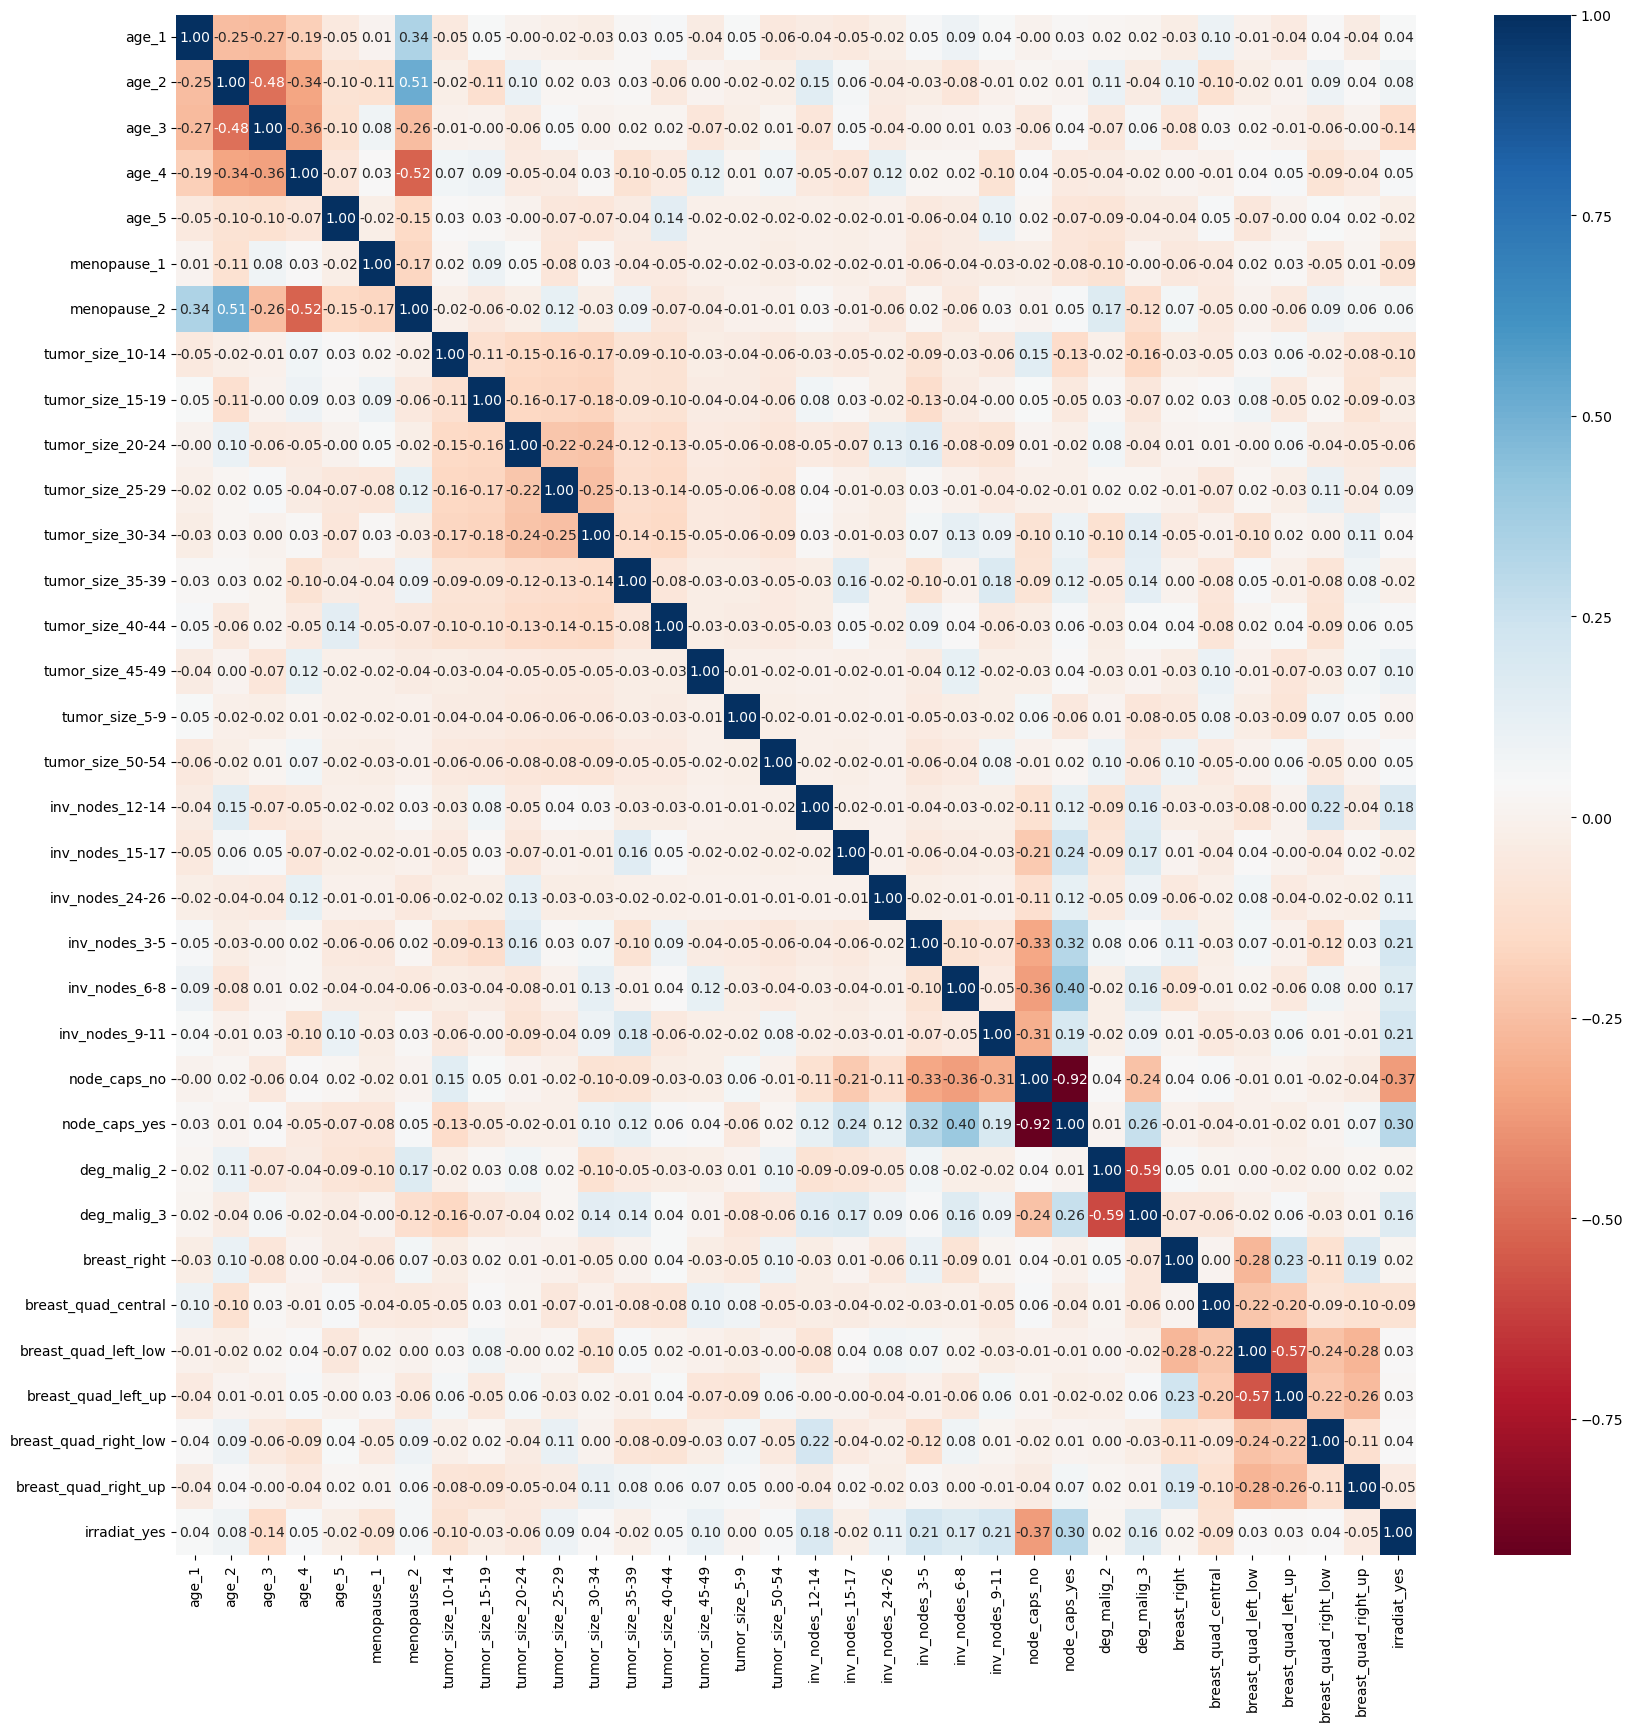

In [222]:
corr = encoded_X_oh_df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

#### Observation:
    Age is correlated to menopause stage
    inv nodes and node caps are correlated

#### Ordinal Encoding
    
    In ordinal encoding, each unique category value is assigned an integer value. For example, “red” is 1, “green” is 2, and “blue” is 3. This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used. The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.

    It is a natural encoding for ordinal variables. For categorical variables, it imposes an ordinal relationship(prioirity order) where no such relationship may exist. This can cause problems and a one-hot encoding may be used instead.

    By default, it will assign integers to labels in the order that is observed in the data. If a specific order is desired, it can be specified via the “categories” argument as a list with the rank order of all expected labels.

    We can demonstrate the usage of this class by converting colors categories “red”, “green” and “blue” into integers. First the categories are sorted then numbers are applied. For strings, this means the labels are sorted alphabetically and that blue=0, green=1 and red=2.
    
    Ordinal Encoding vs Label Encoding:
    ----------------------------------
    LabelEncoder should be used to encode target values, i.e. y, and not the input X. Ordinal encoding should be used for ordinal variables (where order matters, like cold , warm , hot ); vs Label encoding should be used for non-ordinal (aka nominal specially categorical target attribute) variables (where order doesn't matter, like blonde , brunette )

In [95]:
#ordinal encoding example
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# define data
data = np.asarray([['red'], ['green'], ['blue']])
print(data.shape)
print(data)

# define ordinal encoding
encoder = OrdinalEncoder()
#encoder = OrdinalEncoder(categories=[])

# transform data
result = encoder.fit_transform(data)
print(result)

(3, 1)
[['red']
 ['green']
 ['blue']]
[[2.]
 [1.]
 [0.]]


In [32]:
#using map to do ordinal encoding
# age_dict = {'50-59': 6, '40-49': 5, '60-69': 4, '30-39': 3, '70-79': 2, '20-29': 1}
# X['age'] = [*map(age_dict.get, X.age)]

(array([200.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  85.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

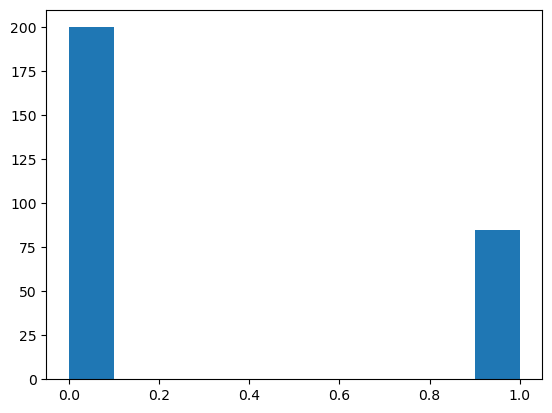

In [166]:
plt.hist(encoded_Y)

#### Observation:
    The classes are imbalanced.Hence accuracy is not a good scoring metric for the classifier. Advisable to use Stratified sampling while sampling the data to represent the population

In [15]:
#startified sampling
x_train, x_test, y_train, y_test = train_test_split(encoded_X, encoded_Y, test_size=0.33, shuffle=True, random_state=0, stratify=encoded_Y)
print("Shapes - x_train: {}, y_train: {}, x_test : {}, y_test : {} ".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

models = {
    ('mdl_LR', LogisticRegression(solver='liblinear')),
    ('mdl_SVC', SVC()),
#     ('mdl_KNN', KNeighborsClassifier()),
    ('mdl_MNB', MultinomialNB()),
    ('mdl_RF', RandomForestClassifier()),
    ('mdl_GB', GradientBoostingClassifier())
}
params = {
    'mdl_LR' : {'penalty': ['l1', 'l2'], 'C': [1, 10]},
    'mdl_SVC' : {'C' : [0.1, 0.01, 0.001, 0.0001]},
#     'mdl_KNN' : {'n_neighbors' : [3, 4, 5, 6]},
    'mdl_MNB' : {'alpha' : [0.3, 0.5, 0.6 ,0.8, 1.0]},
    'mdl_RF' : {'n_estimators' : [100, 200, 300], 'criterion' : ['gini', 'entropy', 'log_loss'], 'bootstrap': [True, False]},
    'mdl_GB' : {'learning_rate' : [0.1, 0.01, 0.001], 'tol' :  [0.1, 0.01, 0.001, 0.0001], 'n_estimators' : [100, 200, 300]}
}
for name, mdl in models:
    param = params[name]
    grid = GridSearchCV(mdl, param_grid=param, refit=True, error_score='raise', cv=10)
    result = grid.fit(x_train, y_train)
print("Best estimator: {}.\n Best score: {}\n {}".format(grid.best_estimator_, grid.best_score_, result))

Shapes - x_train: (190, 34), y_train: (190,), x_test : (95, 34), y_test : (95,) 
Best estimator: SVC(C=0.1).
 Best score: 0.7
 GridSearchCV(cv=10, error_score='raise', estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.001, 0.0001]})


Cross validation score: 0.6736842105263158
Train accuracy: 0.7421052631578947
Test Accuracy: 0.7684210526315789
F1 score: 0.5


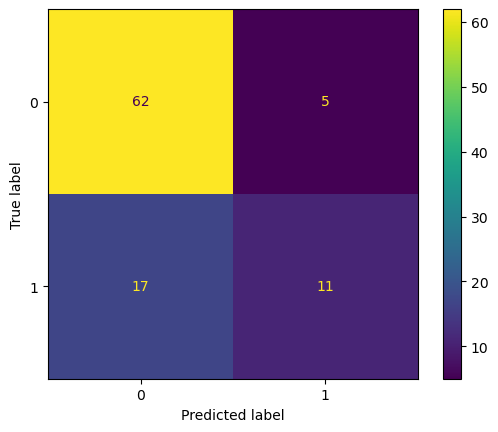

In [85]:
clf = LogisticRegression(C=1, solver='liblinear')
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
score = cross_val_score(clf, x_train, y_train, cv=kfold)
print("Cross validation score: {}".format(score.mean()))
clf.fit(x_train, y_train)
print("Train accuracy: {}".format(clf.score(x_train , y_train)))
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("F1 score: {}".format(f1_score(y_test, y_pred)))
ConfusionMatrixDisplay(cm).plot()

#### Target Encoding
    Target encoding, is meant for high cardinality categorical features. It's a method of encoding categories as numbers, like one-hot or label encoding, with the difference that it also uses the target to create the encoding. This makes it what we call a supervised feature engineering technique.
    
    A target encoding is any kind of encoding that replaces a feature's categories with some number derived from the target.

#### Using neural networks
    #create a sequential model to define sequence of layers, define the input shape, 
    #add the layers - for fully connected, add using Dense() with no. of nodes, activation function(Relu, sigmoid for binary classification, softmax for multi class classification),
    #compile the model by defining loss(binarycross entropy for binary classification), metrics, optimizer(ADAM - stochastic gradient descent) 
    #fit/train the data with no of epochs(whole training pass), batch size(params will be updated after each batch run) .set verbose=False when working in Ipython as it cant print messages for more epochs
    #evaluate to get the training accuracy
    #predict to test the new examples
    
    Note: Loss function vs Cost function
        A loss function/error function is for a single training example/input.
        A cost function, on the other hand, is the average loss over the entire training dataset.
        
        Cost function basically tells us how well our model/line fits(model estimations close to actual true target) all or most of the training data.
        
        Our objective is to find the parameters like w and that minimizes the cost function. i.e find w and b such that yi' is closer to yi for all trainng examples (xi, yi). Gradient descent is an algorithm which helps us to navigate through this cost function surface/error surface until we find the lowest cost function or error.
                            
         Cost function for regression (for all training examples) J(w, b): Σi=1 to m (yi' - yi)^2 where m is total no of training examples
       
       where y' - y is called error that tells how far the prediction is from the target
       
       We use 3d plots to plot cost function, for different params of w and b. Likewise we use contour plots to understand this 3d plot of cost function J with params w and b.
       
       Note: We usually calculate the average cost instead of total cost for all training examples. This is bcoz the training examples are very large in number and the cost function may yield very bigger number for the entire training examples. Hence we perform average cost function everytime that gives significantly lower number(avg squared number instead of total squared number). Just divide the above cost function with m to get average cost function.
                           
         Average Cost function J(w, b): 1/m Σi=1 to m (yi' - yi)^2 = J(w, b): 1/m Σi=1 to m (fw,b(xi) - yi)^2 
                           
                          ( or )
                           
         Average Cost function J(w, b): 1/2m Σi=1 to m (yi' - yi)^2 # Here 1/2m is to make calculations simpler further like differentiations

    Logits:
        In ML, it can be the vector of raw (non-normalized) predictions that a classification model generates, which is ordinarily then passed to a normalization function. If the model is solving a multi-class classification problem, logits typically become an input to the softmax function. The softmax function then generates a vector of (normalized) probabilities with one value for each possible class. In short, logits are the values to be used as input to softmax. 
        
        The raw predictions which come out of the last layer of the neural network.
            1. This is the very tensor on which you apply the argmax function to get the predicted class.
            2. This is the very tensor which you feed into the softmax function to get the probabilities for the predicted classes.

                Logits also sometimes refer to the element-wise inverse of the sigmoid function.

In [18]:
x_train.shape[1] #(rows, columns) - (190, 34)

34

Epoch 1/100
4/4 - 1s - loss: 0.6992 - accuracy: 0.4579 - 776ms/epoch - 194ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6931 - accuracy: 0.5105 - 8ms/epoch - 2ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6874 - accuracy: 0.5737 - 7ms/epoch - 2ms/step
Epoch 4/100
4/4 - 0s - loss: 0.6821 - accuracy: 0.6105 - 9ms/epoch - 2ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6760 - accuracy: 0.6579 - 10ms/epoch - 3ms/step
Epoch 6/100
4/4 - 0s - loss: 0.6702 - accuracy: 0.6737 - 11ms/epoch - 3ms/step
Epoch 7/100
4/4 - 0s - loss: 0.6627 - accuracy: 0.6895 - 6ms/epoch - 2ms/step
Epoch 8/100
4/4 - 0s - loss: 0.6547 - accuracy: 0.7000 - 6ms/epoch - 1ms/step
Epoch 9/100
4/4 - 0s - loss: 0.6459 - accuracy: 0.7000 - 11ms/epoch - 3ms/step
Epoch 10/100
4/4 - 0s - loss: 0.6359 - accuracy: 0.7000 - 11ms/epoch - 3ms/step
Epoch 11/100
4/4 - 0s - loss: 0.6253 - accuracy: 0.7000 - 5ms/epoch - 1ms/step
Epoch 12/100
4/4 - 0s - loss: 0.6141 - accuracy: 0.7000 - 19ms/epoch - 5ms/step
Epoch 13/100
4/4 - 0s - loss: 0.6041 - accuracy: 0.7

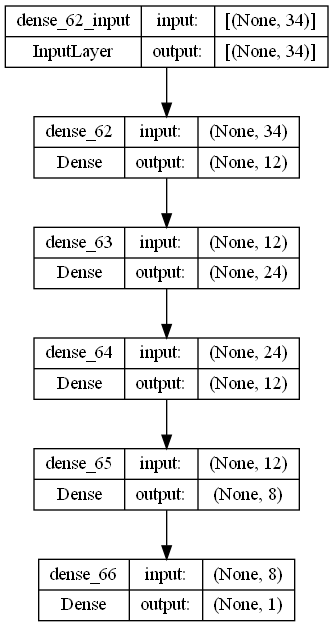

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import plot_model
from tensorflow import cast, int32

model = Sequential()
model.add(Dense(12, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #model.add(Dense(10, activation='softmax')) for categorical classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=50, verbose=2)
score = model.evaluate(x_train, y_train, verbose=0)
print("Training accuracy: {}".format(score))
y_pred = model.predict(x_test) #model.predict will output a matrix in which each row is the probability of that input to be in class 1.
print(y_pred[0])
print(y_test[0])
#It basically will have float with scientific values.Hence we have to convert the probability to prediction output
#note that the probability close to zero belongs to class 0 and close to 1 belongs to class 1
#note in case of multi class classification with softmax, we use tf.argmax.

#We use tf.cast with threshold or tf.argmax for multiclass classification
#binary_preds = tf.cast(prob_pred >= 0.5, tf.int32)

# make a binary prediction from probabilities
binary_preds = cast(y_pred >= 0.7, int32) #0.7 as threshold for class 1
print(binary_preds[:15])
test_score = accuracy_score(y_test, binary_preds)
print("Test Accuracy: {}".format(test_score))
plot_model(model, show_shapes=True, to_file='embeddings.png')

#### Learned Embedding for categorical data

    
    Learned embedding helps to overcome the problems with label and onehot encoding of categorical variables.
    
    Problems with one hot encoding:
    ------------------------------
    "Sparsity, Priority problems, loosing natural order of the categories"(for example,for week variable, category sunday comes after wednesday in the order where as it would be better to have sunday before saturday(weekend) to make more sense of the order.Algorithms(linear and tree)which generalise based on order suffers and lead to more splits in case of tree and bad performances
    
    #Embeddings convert the unique categories of a variable/feature to some vector representation of particular specified length 
    #sunday - < 0.1, 0.9, 0.8, 0.2 > , saturday - <0.9, 0.1, 0.8, 0.2 > , wednesday - <0.3, 0.5, 0.6, 0.7>
    #Embeddings make sure that similar categories are close to each other in vector space and far from different categories
    #An embedding matrix is an NxM matrix of floating-point numbers. Here N is the number of unique categories and M is the embedding dimension. We decide to choose the value of M, initially set the value of M = sqrt N and then we increase or decrease it if needed. An embedding matrix is a lookup table for a vector. Each row of an embedding matrix is a vector for a unique category.
    
    Before diving in, let us skim through some of the applilcations of the embeddings :

        1 ) The first application is in the Collaborative Filtering based Recommender Systems where we have to create the user embeddings and the movie embeddings by decomposing the utility matrix which contains the user-item ratings.

        2 ) The second use is in the Natural Language Processing and its related applications whre we have to create the word embeddings for all the words present in the documents of our corpus.

        For this purpose, we can use the embedding layer in Keras. We will also usually "create the embeddings to embed higher dimensional data into lower dimensional vector space"

#### Working
    - First, the unique categories of each variable/column is identified
    - Use label encoding to encode the unique categories of each variable
    - Pass the label encodings to a neural network embedding layer or pretrained vector models like GloVe(for textual data) by specifying the length of encoding matrix.
    - Neural network learns and generate vectors for each category of a variable - final product is encoding matrix of each feature
    - For an instance/input, to learn, we will take the embedding of each of the instance's values and flatten every embedding to a single dimension
    - We now concatenate the flatten embedding of all of the instance's value(single instance's embeddings) and send it to the neural network to learn via embeddings
    - Embeddings are byproduct and we can use these embeddings for similar data models as well directly(Transfer Learning)
    - Embeddings can be used in Keras via the Embedding layer.One embedding layer is required for each categorical variable
    
      More: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
            https://keras.io/api/layers/core_layers/embedding/

In [143]:
#embedded encoding sample example
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
import numpy as np

model = Sequential()
embedding_layer = Embedding(input_dim=10, output_dim=4, input_length=6)
model.add(embedding_layer)
model.compile('adam','mse')


# input_dim : Size of the vocabulary.How large is the vocabulary. How many categories are you encoding? This is the number of items in your lookup table or embedding matrix
# output_dim : Length of the vector for each word. how many numbers of vector for each word you wish to return
# input_length : Maximum length of a sequence. How many items in the input feature vector that you need to transform or encode at a time
# Here, we are setting 10 as the vocabulary size, as we will be encoding numbers 0 to 9. 
#We want the length of the word vector to be 4, hence output_dim is set to 4.
#The length of the input sequence to embedding layer will be 6.

#Now, lets pass a sample input to our model and see the results.
input_data = np.array([[1, 2, 3, 6, 3, 2]])
print(input_data.shape)
pred = model.predict(input_data)
print(pred)

#here when we initially run, we are not training the model but just predicting it.
#we can see that it returns 6 rows of vectors for each unique number in the input series.
#these are just random numbers assigned by the network initially
#we can see the weights or embedding matrix or lookup table as we defined in the embedding layer using embedding_layer.get_weights()
#this will give lookup matrix 10 rows as specified by input_dim=10 and 4 cols represented by output_dim=4
#if we observe, the values that are returned by model in pred will be same in look up matrix for the respective numbers.
#To see, rows in lookup matrix starts from index 0. The vector for number 1 in model pred is same as vector at index 1 in lookup table
#Likewise, the vector of number 6 in pred is same as vector in index 6 of look up matrix
#since ou sequence has only 6 numbers, the lookup table has vectors of all those 6 numbers, along with remianing 4 rows as random assignment bcz we specified input dimension as 10.
#this is just a lookup table. GloVe also provides the lookup table of huge corpus just like this
#when we train the neural model, we have make these weights as non-trainable.we should not train these vectors
print(pred.shape)
print(embedding_layer.get_weights())
print(embedding_layer.get_weights()[0].shape)



(1, 6)
1/1 [==============================] - 0s 39ms/step
[[[-0.0212415  -0.03022819  0.00212849 -0.01270611]
  [ 0.03040722  0.0489563  -0.04955326  0.04981058]
  [-0.03113158  0.04891813 -0.00755966  0.03811352]
  [ 0.00362885 -0.03209626  0.01573661 -0.03041082]
  [-0.03113158  0.04891813 -0.00755966  0.03811352]
  [ 0.03040722  0.0489563  -0.04955326  0.04981058]]]
(1, 6, 4)
[array([[-0.02776825,  0.04051125, -0.03352515,  0.01038617],
       [-0.0212415 , -0.03022819,  0.00212849, -0.01270611],
       [ 0.03040722,  0.0489563 , -0.04955326,  0.04981058],
       [-0.03113158,  0.04891813, -0.00755966,  0.03811352],
       [ 0.00936148, -0.04774776,  0.0184207 , -0.02651764],
       [-0.03646703, -0.00325144, -0.02741271,  0.03337396],
       [ 0.00362885, -0.03209626,  0.01573661, -0.03041082],
       [-0.03970101,  0.03298113, -0.0264523 , -0.04157114],
       [-0.00637732,  0.03246127,  0.04531688,  0.00309067],
       [-0.0368031 , -0.03986097, -0.03733985, -0.03620536]],
     

In [149]:
#embedded encoding eg 2
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(7, 2, input_length=5))

input_array = np.random.randint(5, size=(1, 5))
print(input_array)
print(input_array.shape)

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
print(output_array)
print(output_array.shape)
print(model.get_weights())
#embedding layer gives 1 X 4 X 2 vectors from  1 X 4 vector - see output_array 
#about the weights - https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work

[[4 2 1 4 1]]
(1, 5)
1/1 [==============================] - 0s 31ms/step
[[[ 0.03120584  0.01540187]
  [ 0.02405763  0.0338842 ]
  [-0.03391599  0.00552712]
  [ 0.03120584  0.01540187]
  [-0.03391599  0.00552712]]]
(1, 5, 2)
[array([[-0.00831443, -0.01794795],
       [-0.03391599,  0.00552712],
       [ 0.02405763,  0.0338842 ],
       [-0.00122843, -0.03048711],
       [ 0.03120584,  0.01540187],
       [-0.03942344,  0.04596196],
       [-0.03593444,  0.02556238]], dtype=float32)]


In [309]:
#Label Encoding the entire data - Label encoding expects 1D array.Hence passing each input variable of X after enumerating
label_encoder = LabelEncoder()
le_X = []
le_Y = []

#encoding each variable(column wise for all the rows)
for col in X.columns:
    enc_variable = label_encoder.fit_transform(X[col])
    le_X.append(enc_variable)
    #Main intention to add the each encoded feature to a list is to create a list for flattening easily

le_Y = label_encoder.fit_transform(Y)
print(len(le_Y))
print(len(le_X[0])) #accesing the age - firstcolumn after label encoding
print(le_X[0]) #values after label encoding of first variable 'age' for all the instances
print(le_X[1]) #values after label encoding of second variable 'menopause' for all the instances


285
285
[2 2 4 2 4 3 4 2 2 2 3 4 3 2 4 2 3 4 3 3 4 1 3 3 2 3 4 2 4 3 3 3 3 3 1 3 3
 2 2 3 4 4 2 3 3 2 3 2 2 3 1 3 5 5 5 3 3 4 4 2 2 3 0 2 2 2 3 3 4 4 2 4 3 1
 3 3 1 3 2 3 4 4 3 2 3 4 5 3 2 1 3 3 4 3 2 4 4 2 1 2 3 3 2 2 2 2 1 2 4 3 3
 2 2 2 3 1 2 1 4 4 3 3 3 4 5 1 1 3 2 2 2 2 3 4 1 1 2 1 2 3 3 4 2 4 2 4 3 1
 3 3 4 3 4 1 4 3 3 3 2 2 2 4 4 4 2 2 2 3 2 1 1 4 3 3 2 2 4 3 2 2 2 2 3 3 2
 3 4 2 3 2 2 3 1 3 3 3 2 3 3 4 3 2 3 3 1 3 3 3 2 2 3 2 3 4 2 3 2 4 1 2 1 4
 4 1 2 2 3 4 4 3 2 1 5 4 3 2 2 1 2 4 2 3 3 2 1 1 3 4 1 2 2 1 4 2 2 2 2 3 3
 4 2 4 3 3 1 2 4 1 2 3 3 2 4 4 2 1 4 3 3 3 1 1 4 2 3]
[2 2 0 2 0 2 0 2 2 2 0 1 0 2 1 2 2 0 0 0 0 2 2 2 2 2 0 2 0 0 2 2 0 0 2 0 0
 2 2 0 0 0 2 0 0 2 2 2 2 1 2 2 0 0 0 0 0 0 0 2 2 0 2 2 2 2 0 0 0 0 2 0 2 2
 0 0 2 2 2 0 0 0 0 2 0 0 0 0 2 2 0 0 0 2 2 0 0 2 2 0 0 2 2 2 2 2 2 2 0 0 0
 2 2 2 0 2 0 2 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 0 2 0 2 0 2 2
 1 0 0 0 0 1 0 0 2 0 2 2 2 0 0 0 2 2 0 2 0 2 2 0 0 2 2 0 0 2 2 2 2 2 0 0 2
 0 0 2 0 2 2 0 2 2 0 2 2 0 2 0 2 2 0 2

       age  menopause tumor_size inv_nodes node_caps  deg_malig breast  \
48   40-49          2      20-24       0-2        no          1  right   
230  40-49          2      30-34       3-5        no          2  right   

    breast_quad irradiat  
48     left_low       no  
230     left_up       no  
len(le_X_train): 9
len(le_X_train[0]): 190
le_Y_train.shape: (190,)
(190, 1, 1)
Feature: 1, Unique_values: 5
Input Layer: (None, 1)
Embedding Layer: (None, 1, 10)
Feature: 2, Unique_values: 3
Input Layer: (None, 1)
Embedding Layer: (None, 1, 10)
Feature: 3, Unique_values: 11
Input Layer: (None, 1)
Embedding Layer: (None, 1, 10)
Feature: 4, Unique_values: 6
Input Layer: (None, 1)
Embedding Layer: (None, 1, 10)
Feature: 5, Unique_values: 3
Input Layer: (None, 1)
Embedding Layer: (None, 1, 10)
Feature: 6, Unique_values: 3
Input Layer: (None, 1)
Embedding Layer: (None, 1, 10)
Feature: 7, Unique_values: 2
Input Layer: (None, 1)
Embedding Layer: (None, 1, 10)
Feature: 8, Unique_values: 5
Input

4/4 - 0s - loss: 0.4370 - accuracy: 0.7842 - 18ms/epoch - 4ms/step
Epoch 88/150
4/4 - 0s - loss: 0.4363 - accuracy: 0.7842 - 8ms/epoch - 2ms/step
Epoch 89/150
4/4 - 0s - loss: 0.4358 - accuracy: 0.7895 - 8ms/epoch - 2ms/step
Epoch 90/150
4/4 - 0s - loss: 0.4354 - accuracy: 0.7895 - 14ms/epoch - 3ms/step
Epoch 91/150
4/4 - 0s - loss: 0.4346 - accuracy: 0.7842 - 12ms/epoch - 3ms/step
Epoch 92/150
4/4 - 0s - loss: 0.4339 - accuracy: 0.7895 - 7ms/epoch - 2ms/step
Epoch 93/150
4/4 - 0s - loss: 0.4334 - accuracy: 0.7789 - 10ms/epoch - 2ms/step
Epoch 94/150
4/4 - 0s - loss: 0.4326 - accuracy: 0.7789 - 0s/epoch - 0s/step
Epoch 95/150
4/4 - 0s - loss: 0.4324 - accuracy: 0.7789 - 17ms/epoch - 4ms/step
Epoch 96/150
4/4 - 0s - loss: 0.4315 - accuracy: 0.7842 - 12ms/epoch - 3ms/step
Epoch 97/150
4/4 - 0s - loss: 0.4309 - accuracy: 0.7842 - 5ms/epoch - 1ms/step
Epoch 98/150
4/4 - 0s - loss: 0.4303 - accuracy: 0.7895 - 16ms/epoch - 4ms/step
Epoch 99/150
4/4 - 0s - loss: 0.4298 - accuracy: 0.7895 - 9m

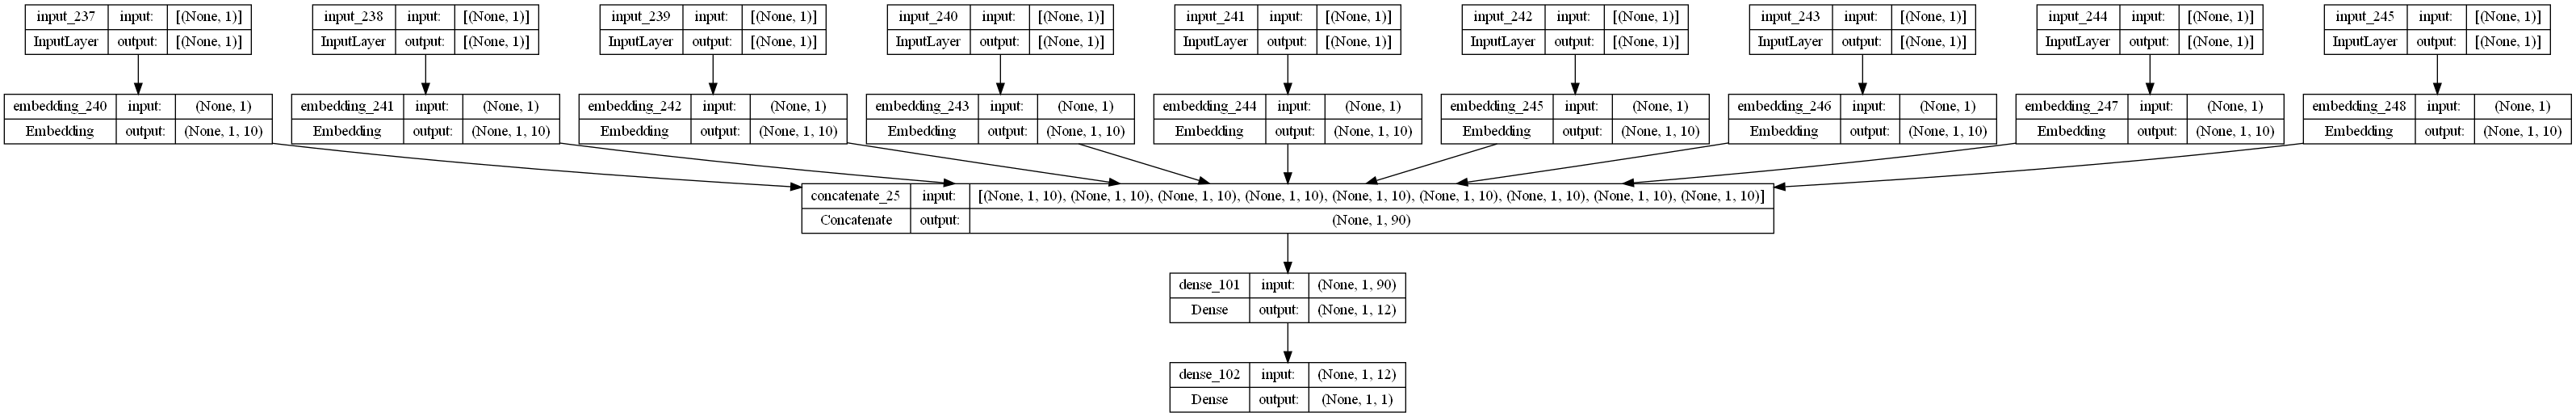

In [158]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Input
from keras.optimizers import Adam
from keras import Model
from keras.layers.merging import concatenate
from keras.utils import plot_model

def input_label_encoding(X):
    le_input = []
    for col in X.columns:
        le = LabelEncoder()
        le_X = le.fit_transform(X[col])
        le_input.append(le_X)
    return le_input

def target_label_encoding(Y):
    le = LabelEncoder()
    le_Y = le.fit_transform(Y)
    return le_Y
    

#Resampling
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=True, shuffle=True)
print(x_train.head(2))
#label encoding
le_X_train = input_label_encoding(x_train) #return list of len 9 where each element if a list contains labels encoding of each feature for all the rows 
le_X_test = input_label_encoding(x_test)
le_Y_train = target_label_encoding(y_train)
le_Y_test = target_label_encoding(y_test)

print(f"len(le_X_train): {len(le_X_train)}")
print(f"len(le_X_train[0]): {len(le_X_train[0])}")
print(f"le_Y_train.shape: {le_Y_train.shape}")

le_Y_train = le_Y_train.reshape((len(le_Y_train), 1, 1)) #reshaped to 3d bcz logits after the input embedding and concatenating will be 3d
le_Y_test = le_Y_test.reshape((len(le_Y_test), 1, 1))
print(le_Y_train.shape)

#now pass the label encoded inputs to the neural network for embedding.
#we are using keras to do the embedding for each input categorical variable.
#results are embedded matrix for each variable of specified size(m*n)

#create input head
inp_layers, emb_layers = [], []
for i in range(len(le_X_train)): #9
    n_labels = len(np.unique(le_X_train[i])) #getting unique values from each categorical feature - le_X_train[i] = 190 actual values (all rows) 
    print(f"Feature: {i+1}, Unique_values: {n_labels}")
    #defining input layer
    inp_layer = Input(shape=(1,))
    #indicates input will take a 1 dimensional array - each feature will be taken as input
    print(f"Input Layer: {inp_layer.shape}")
    
    #INFO :
    #Input() is used to instantiate a Keras tensor.A Keras tensor is a symbolic tensor-like object, which we augment with
    #certain attributes that allow us to build a Keras model just by knowing the inputs and outputs of the model.
    #For instance, if a, b and c are Keras tensors, it becomes possible to do: model = Model(input=[a, b], output=c)
    
    #defining embedding layer
    #Embedding layer Turns positive integers (indexes) into dense vectors of fixed size.
    emb_layer = Embedding(n_labels, 10)(inp_layer) #returns embedding matrix of each feature
    print(f"Embedding Layer: {emb_layer.shape}")
    #creates a embedding matrix of shape (None, rowsforeachuniquefeature, 10)
    #i.e each embedding matrix contains all the unique categories of each feature as rows and their respective vectors of size 10
    # feature1-uniquecategory1 <0.1, 0.2, ... ,1.0> see the diagram below in the output
    
    #storing the layers
    inp_layers.append(inp_layer)
    emb_layers.append(emb_layer) 
    #contains list of 9 embedding matrixes of shape(uniquevalues, 10) - each representing a feature
   
print(len(inp_layers)) #9
# print(inp_layers[:2])

#concatentate embedding matrices of all the variables
# print(len(emb_layers)) #90
print(emb_layers[0])

merged = concatenate(emb_layers)
print(f"After concatenating, shape of embedded matrix is: {merged.shape}")

#define the dense layers after generating embeddings
dense = Dense(12, activation='relu')(merged)
output = Dense(1, activation='sigmoid')(dense)
model = Model(inputs=inp_layers, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(le_X_train, le_Y_train, epochs=150, batch_size=50, verbose=2)
train_score = model.evaluate(le_X_train, le_Y_train, verbose=0) #returns loss and accuracy
print("Training accuracy : {}".format(train_score))
# print(len(model.get_weights()))

#plot the model
plot_model(model, show_shapes=True, to_file='embeddings.png')

#testing also needs to create the embedded lookup matrix for input like training
# y_pred = model.predict(le_X_test)

In [21]:
np.random.randint(5, size=(5,))

array([4, 3, 4, 1, 2])

In [310]:
!pip install categorical_embedder

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=774a6a8cde57724c5594b160acd4102636a23a2c6841dcf65f26bb145fe951ca
  Stored in directory: c:\users\malla\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
